In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#df = pd.read_csv('/kaggle/input/playground-series-s5e5')

competition_path = '/kaggle/input/playground-series-s5e5'
print(os.listdir(competition_path))

['sample_submission.csv', 'train.csv', 'test.csv']


In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')


In [4]:
print(train_df.head())

   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0


In [5]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
train_df.dtypes

id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [7]:
train_df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
train_df = train_df.drop(columns=['id'])


In [9]:
train_df.duplicated().sum()

2841

In [10]:
train_df.shape

(750000, 8)

In [11]:
duplicated_rows = train_df[train_df.duplicated(keep=False)]
display(duplicated_rows)

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
19,male,51,187.0,94.0,3.0,81.0,38.8,10.0
212,female,32,176.0,71.0,3.0,81.0,38.6,10.0
784,male,45,199.0,102.0,1.0,83.0,37.7,4.0
1129,female,48,161.0,61.0,11.0,91.0,40.1,52.0
1223,female,54,161.0,61.0,9.0,88.0,39.7,42.0
...,...,...,...,...,...,...,...,...
749584,female,39,161.0,61.0,13.0,99.0,40.3,74.0
749823,female,29,173.0,68.0,14.0,95.0,40.2,67.0
749852,male,21,187.0,90.0,9.0,91.0,39.7,30.0
749889,male,40,191.0,88.0,5.0,86.0,39.0,18.0


In [12]:
train_df.value_counts().loc[lambda x: x > 1]

Sex     Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
female  42   161.0   64.0    15.0      93.0        40.3       74.0        7
        54   161.0   61.0    14.0      95.0        40.3       76.0        7
male    48   187.0   88.0    11.0      90.0        40.0       52.0        6
        40   191.0   88.0    14.0      93.0        40.3       64.0        6
female  48   158.0   60.0    11.0      87.0        40.0       49.0        6
                                                                         ..
        40   159.0   59.0    2.0       81.0        38.3       7.0         2
male    21   187.0   90.0    25.0      111.0       40.7       158.0       2
female  42   171.0   70.0    2.0       82.0        38.1       7.0         2
        25   171.0   70.0    7.0       88.0        39.4       27.0        2
        23   165.0   66.0    9.0       90.0        39.8       37.0        2
Name: count, Length: 2564, dtype: int64

In [13]:
# After removing the ID unique identifier column, there appears to be quite a few duplicated columns.
# There is a decent chance that these duplicated values may be genuine data collected from different individuals.
# Since as this duplicated data only represents a small ammount of the data, it was decided to keep the first occurence and delete the rest.

In [14]:
train_df = train_df.drop_duplicates(keep='first')

In [15]:
heat_map_numerical = train_df.drop(columns=['Sex'])
correlation_matrix = heat_map_numerical.corr()

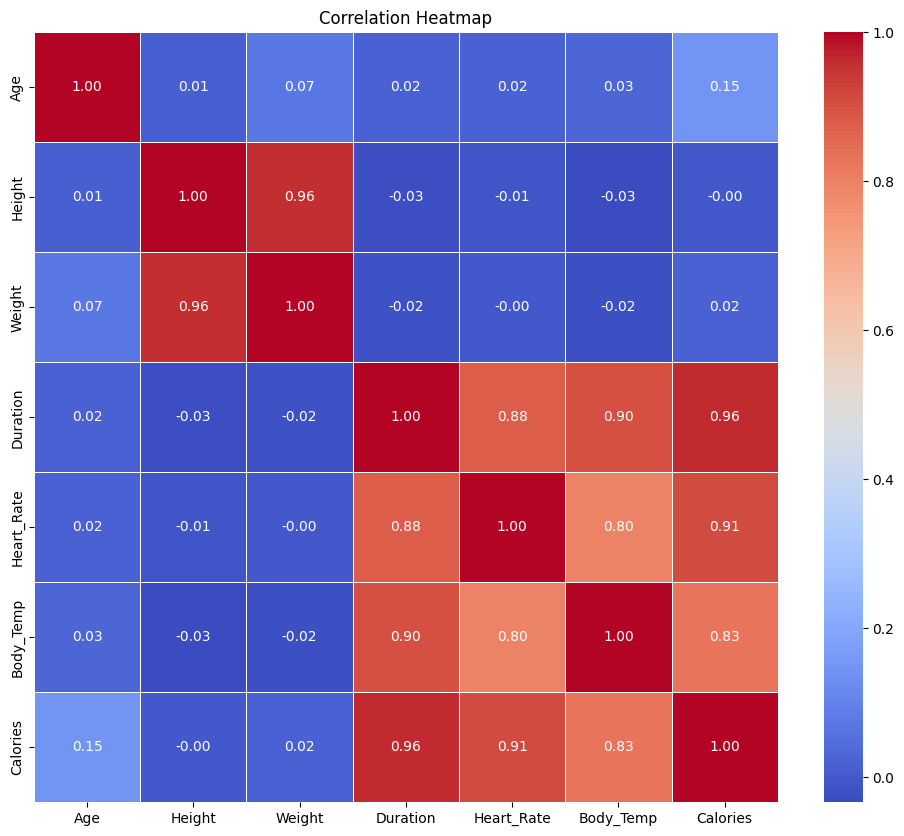

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# When viewing the Heatmap, there is quite a lot of multicollinearity present in the data which is going to have a significant 
# effect on the models that will be used to predict Calories

# To help with this, I will look to do some feature engineering and also look to use PCA.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


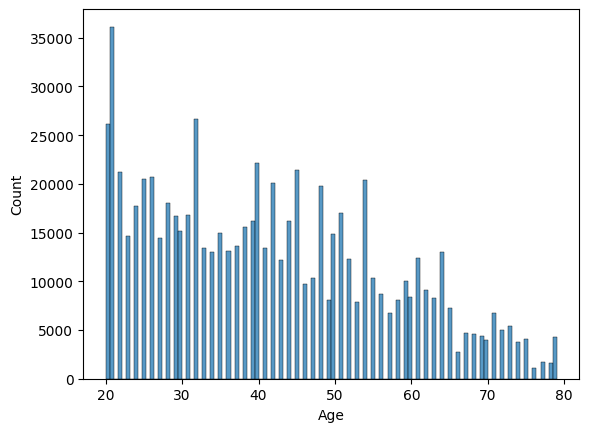

In [18]:
sns.histplot(train_df['Age'])
plt.show()

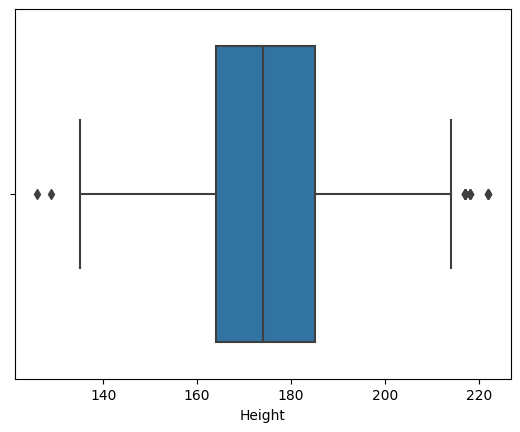

In [19]:
sns.boxplot(x='Height', hue='Sex', data=train_df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


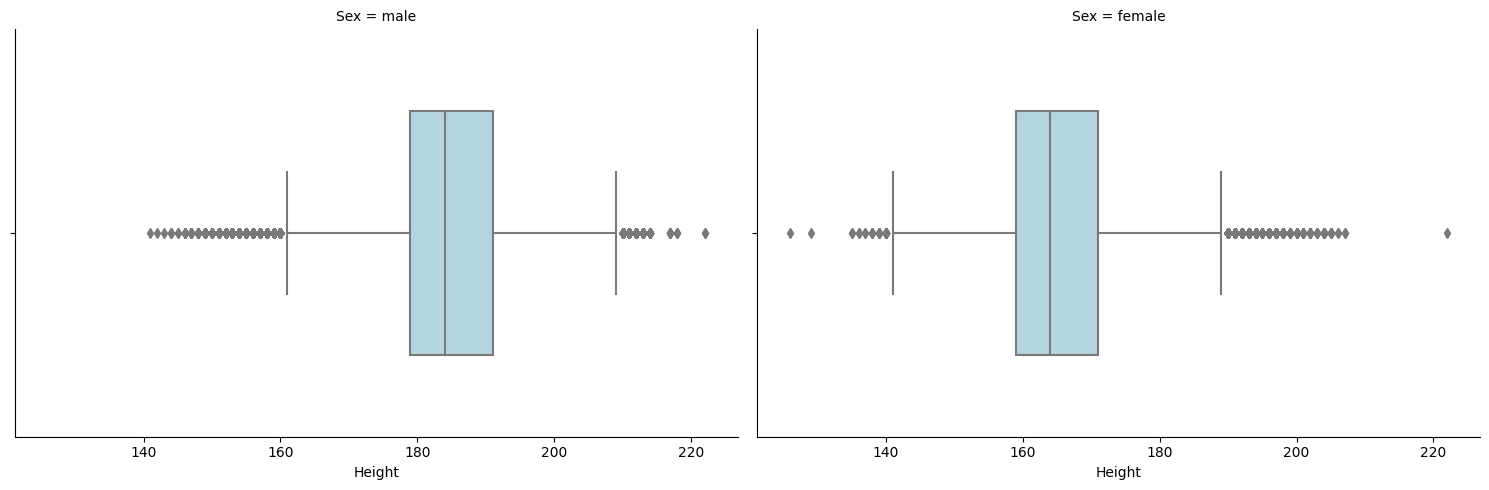

In [20]:
g=sns.FacetGrid(train_df, col='Sex', height=5, aspect=1.5)
g.map(sns.boxplot, 'Height', color='lightblue', width=0.6)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


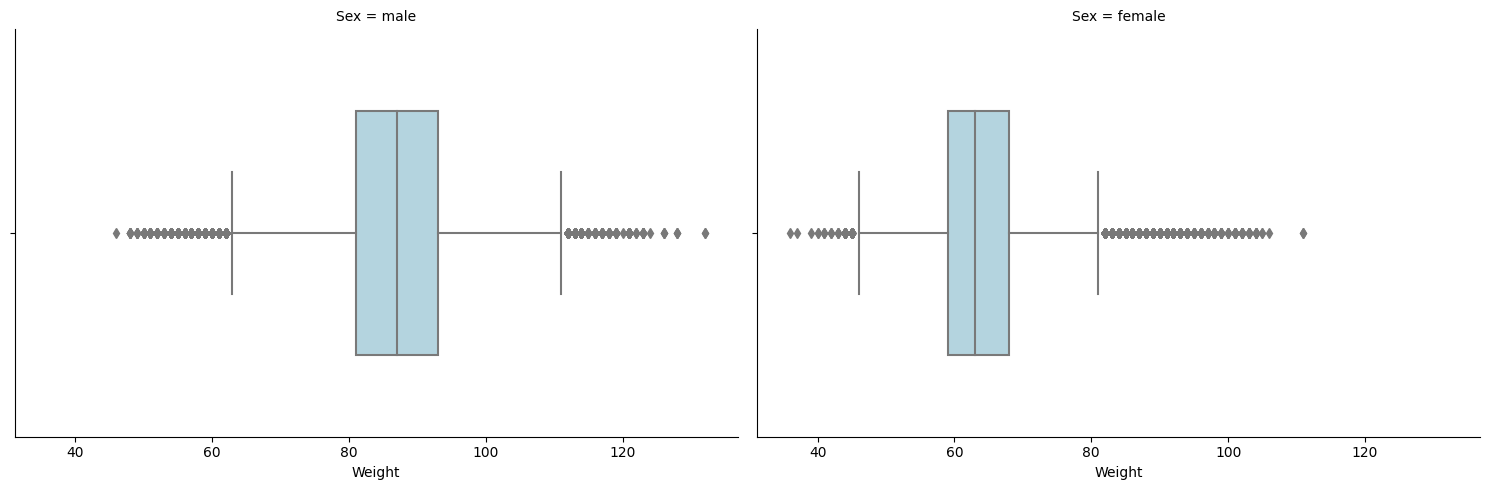

In [21]:
g=sns.FacetGrid(train_df, col='Sex', height=5, aspect=1.5)
g.map(sns.boxplot, 'Weight', color='lightblue', width=0.6)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


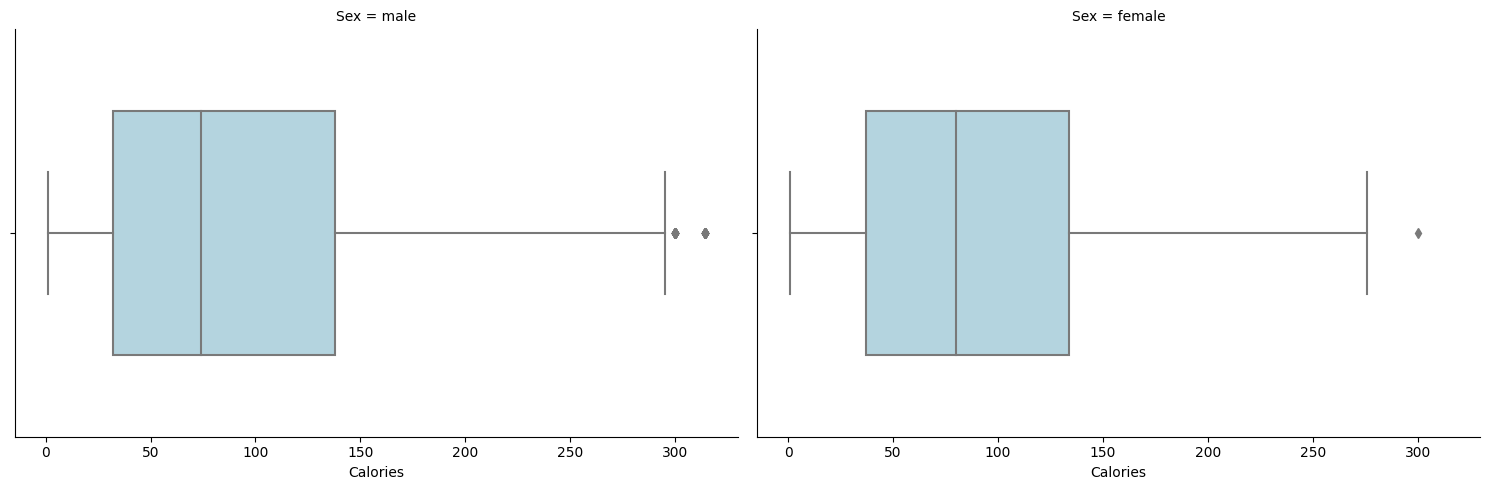

In [22]:
g=sns.FacetGrid(train_df, col='Sex', height=5, aspect=1.5)
g.map(sns.boxplot, 'Calories', color='lightblue', width=0.6)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


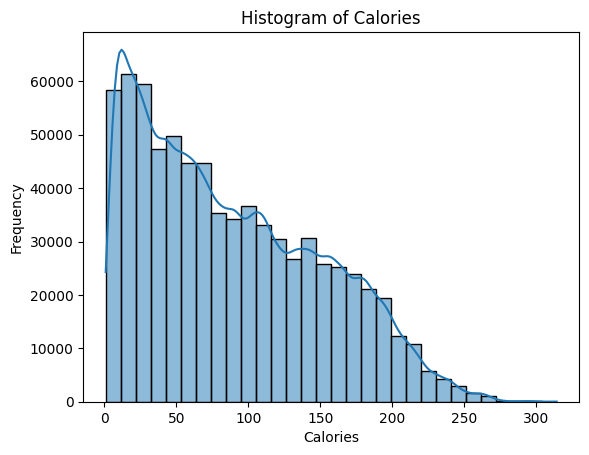

In [23]:
sns.histplot(train_df['Calories'], kde=True, bins=30)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Histogram of Calories')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


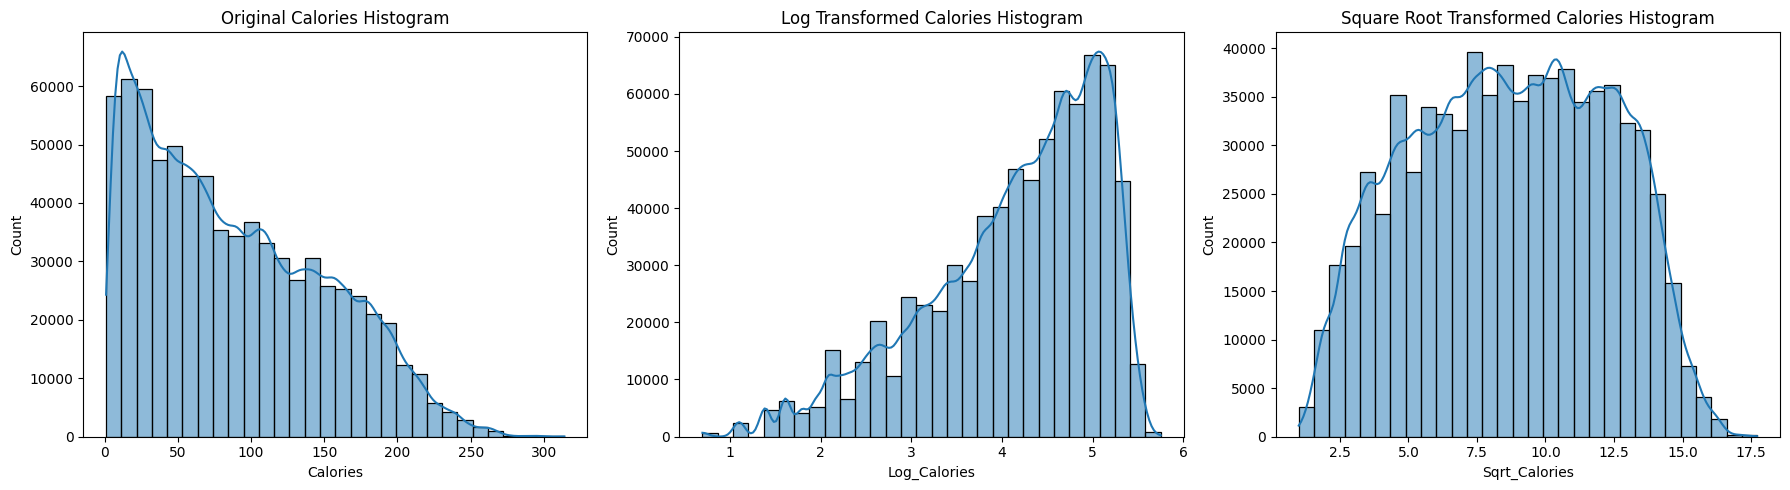

In [24]:
## There is quite a high positive skew present here. Because of this I will look to take the log to transform the data.

train_df['Log_Calories'] = np.log1p(train_df['Calories'])
train_df['Sqrt_Calories'] = np.sqrt(train_df['Calories'])

# Plot the original and transformed histograms for Calories
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(train_df['Calories'], kde=True, bins=30)
plt.title('Original Calories Histogram')

plt.subplot(1, 3, 2)
sns.histplot(train_df['Log_Calories'], kde=True, bins=30)
plt.title('Log Transformed Calories Histogram')

plt.subplot(1, 3, 3)
sns.histplot(train_df['Sqrt_Calories'], kde=True, bins=30)
plt.title('Square Root Transformed Calories Histogram')

plt.tight_layout()
plt.show()

<Axes: xlabel='Sex', ylabel='Calories'>

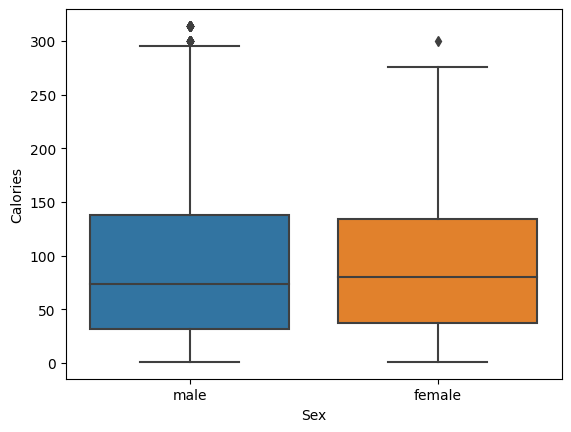

In [25]:
sns.boxplot(x='Sex', y='Calories', data=train_df)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_bin', ylabel='Calories'>

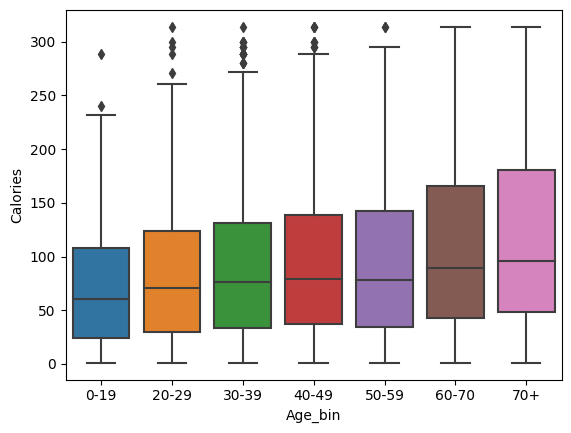

In [26]:
train_df['Age_bin'] = pd.cut(train_df['Age'], 
                             bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                             labels=['0-19', '20-29', '30-39', '40-49','50-59', '60-70', '70+'])
sns.boxplot(x='Age_bin', y='Calories', data=train_df)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


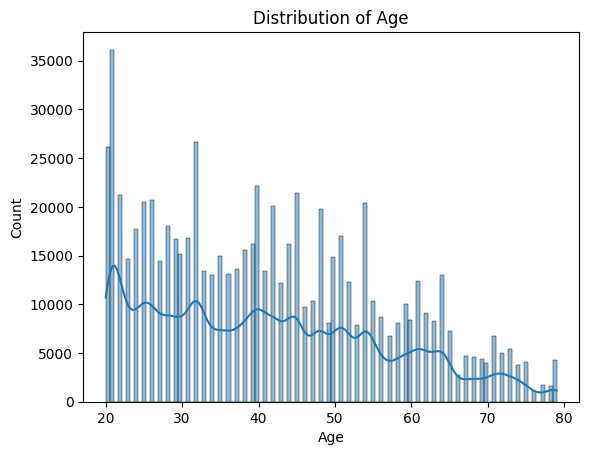

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


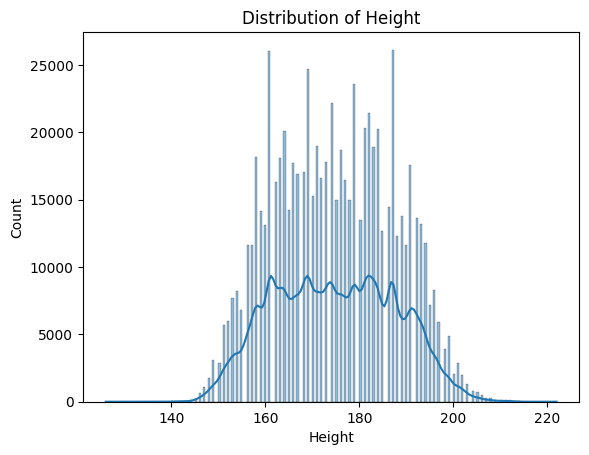

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


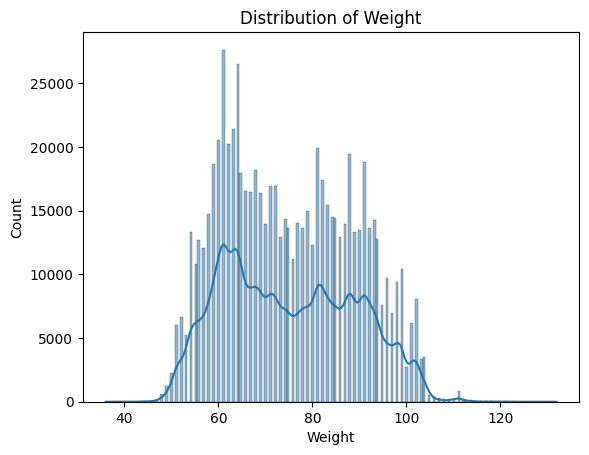

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


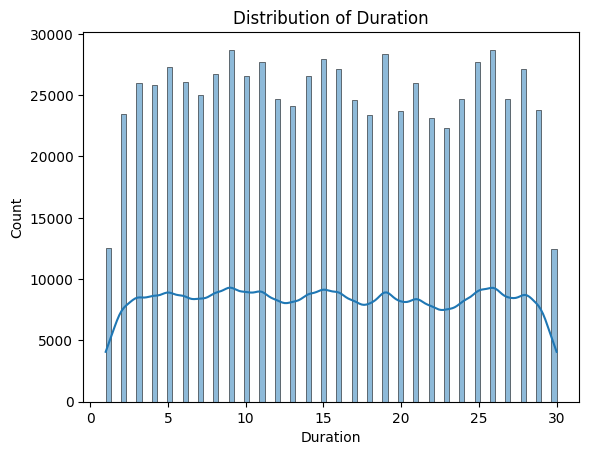

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


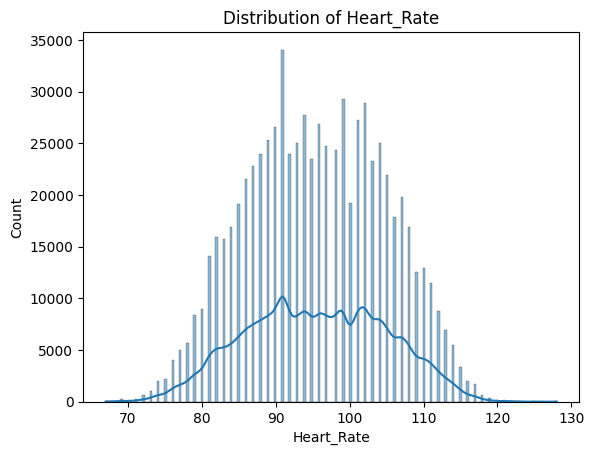

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


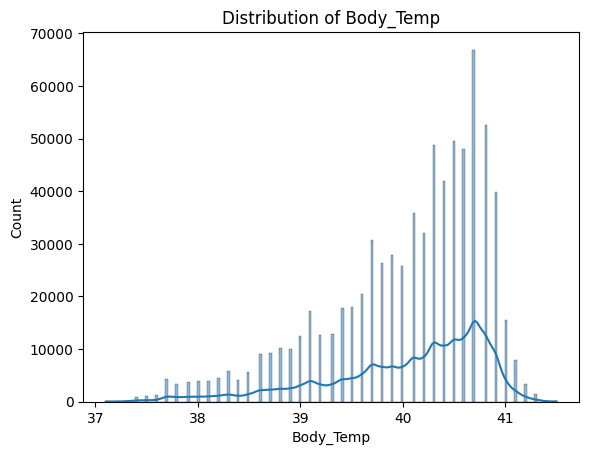

In [27]:
for col in ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']:
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: xlabel='Duration', ylabel='Calories'>

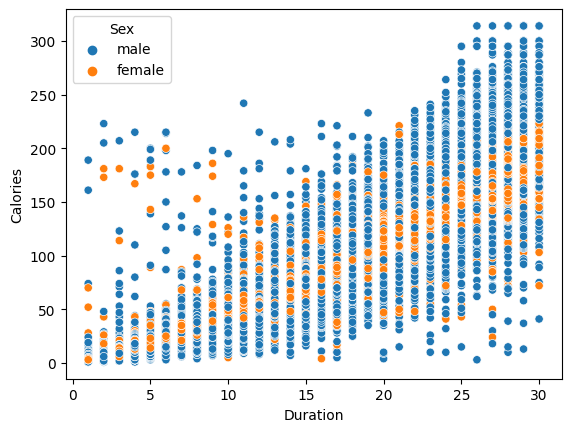

In [28]:
sns.scatterplot(x='Duration', y='Calories', hue='Sex', data=train_df)


In [29]:
# Heart rate per minute

train_df['HR_per_min'] = train_df['Heart_Rate'] * train_df['Duration']

In [30]:
train_df.columns.tolist()

['Sex',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories',
 'Log_Calories',
 'Sqrt_Calories',
 'Age_bin',
 'HR_per_min']

In [31]:
# Convert Height and Weight into BMI:

train_df['Height_meters'] = train_df['Height'] / 100

train_df['BMI'] = train_df['Weight'] / (train_df['Height_meters'] ** 2)

In [32]:
train_df = train_df.drop(columns=['Height', 'Weight', 'Height_meters', 'Log_Calories','Sqrt_Calories'])

In [33]:
X = train_df.drop(['Calories'], axis=1)
y = np.sqrt(train_df['Calories'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print(X_train.isna().sum())
print(y_train.isna().sum())

Sex           0
Age           0
Duration      0
Heart_Rate    0
Body_Temp     0
Age_bin       0
HR_per_min    0
BMI           0
dtype: int64
0


In [35]:
X_train.dtypes

Sex             object
Age              int64
Duration       float64
Heart_Rate     float64
Body_Temp      float64
Age_bin       category
HR_per_min     float64
BMI            float64
dtype: object

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Sex', 'Age_bin']

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)

In [37]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor

# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge": Ridge(),
#     "Lasso": Lasso(),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "HistGradient Boosting": HistGradientBoostingRegressor(random_state=42),
#     "KNN": KNeighborsRegressor(),
#     "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
#     "XGBoost": XGBRegressor(random_state=42),
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_val)
#     print(f"{name}:")
#     print(f"  RMSE: {mean_squared_error(y_val, preds, squared=False):.2f}")
#     print(f"  MAE:  {mean_absolute_error(y_val, preds):.2f}")
#     print(f"  R²:   {r2_score(y_val, preds):.3f}\n")